In [219]:
#Importo il dataset Covid
import pandas as pd
df=pd.read_csv("owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401076,ZWE,Africa,Zimbabwe,2024-05-08,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401077,ZWE,Africa,Zimbabwe,2024-05-09,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401078,ZWE,Africa,Zimbabwe,2024-05-10,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
401079,ZWE,Africa,Zimbabwe,2024-05-11,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [220]:
#dimensioni del dataset
print(f"il dataset ha {df.shape[0]} righe e {df.shape[1]} colonne")

il dataset ha 401081 righe e 67 colonne


In [221]:
#metadati
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [222]:
"""Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente."""

#Creo maschera per filtrare record con campo "continent" valorizzato
mask=~(df["continent"].isna())

#Creo una nuova variabile a cui assegno il dataframe filtrato utilizzando la maschera mask
df_filt=df.loc[mask]

#Creo una variabile casi_totali, in cui sarà memorizzata la series che mostra per ogni continente il numero totale di casi
casi_totali=df_filt.groupby("continent")["new_cases"].sum()

#Converto i valori numerici contenuti in casi_totali in valori interi
casi_totali=casi_totali.astype(int)

#Visualizzo i casi totali per continente
print(casi_totali)

continent
Africa            13143942
Asia             301487163
Europe           252574063
North America    124568488
Oceania           14940134
South America     68834959
Name: new_cases, dtype: int32


In [223]:
"""Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti,
ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale 
rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);"""


def comparazione_continenti(lista_continenti,df):
    #Identifico il numero totale di casi nel mondo
    mask=df["location"]=="World"
    nc_world=int(df.loc[mask]["new_cases"].sum())

    #Creo un dizionario vuoto funzionale al loop successivo
    dict_cont_statistics={}
    
    #per ogni continente
    for cont in lista_continenti:
        #Definisco la maschera di filtraggio
        mask=df["continent"]==cont
        
        #Definisco il dataframe contenente solo record relativi al continente cont
        df_cont=df[mask]

        #Calcolo le statistiche relative al continente cont
        max_cont=round(df_cont["new_cases"].max())
        mean_cont=round(df_cont["new_cases"].mean())
        prop_cont=round((df_cont["new_cases"].sum()/nc_world)*100)

        #Definisco la coppia chiave-valore da aggiungere al dizionario, costituita dal continente cont e dalla lista delle statistiche
        
        dict_cont_statistics[cont]=[max_cont,mean_cont,prop_cont]


    #Converto il dizionario ottenuto al termine del loop in un dataframe
    df_cont_statistics=pd.DataFrame(dict_cont_statistics,index=["Numero massimo di nuovi casi giornalieri","Numero medio di nuovi casi giornalieri","% sul totale dei casi nel mondo"])
    
    #La funzione deve ritornare tale dataframe in output
    return df_cont_statistics

comparazione_continenti(["Europe","Asia"],df)


,Europe,Asia
Numero massimo di nuovi casi giornalieri,2417043,40475477
Numero medio di nuovi casi giornalieri,3151,4035
% sul totale dei casi nel mondo,33,39


<Axes: title={'center': 'ANDAMENTO DEI CASI TOTALI COVID IN ITALIA NEL 2022'}, xlabel='date'>

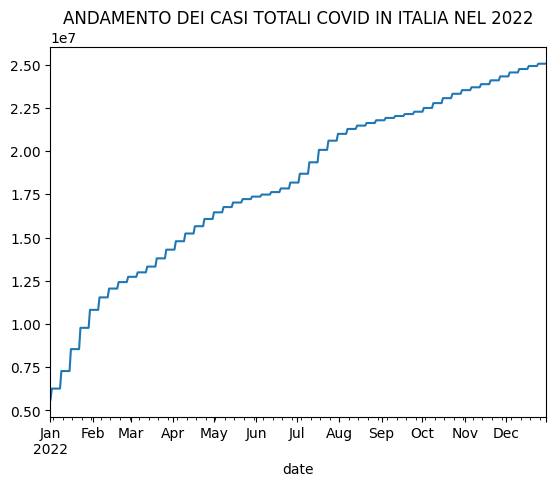

In [224]:
#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 


#Coverto il data type della colonna date da object a datetime
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

#Aggiungo al dataframe una colonna che specifichi l'anno
df["year"]=df["date"].dt.year


#Genero la maschera necessaria a filtrare i dati relativi all'Italia nel 2022
mask=(df["location"]=="Italy") & (df["year"]==2022)

#Genero il dataframe che contiene i dati relativi all'Italia nel 2022
df_ita=df.loc[mask]

#Verifico il corretto filtraggio deidati
#print(df_ita["location"].value_counts())
#print(df_ita["year"].value_counts())

#Setto come indici del df_ita le date
df_ita=df_ita.set_index("date")

#Realizzo il grafico che mostra l'andamento dei casi totali in Italia nel 2022
df_ita["total_cases"].plot(title="ANDAMENTO DEI CASI TOTALI COVID IN ITALIA NEL 2022")






<Axes: title={'center': 'ANDAMENTO DEI NUOVI CASI COVID IN ITALIA NEL 2022'}, xlabel='date'>

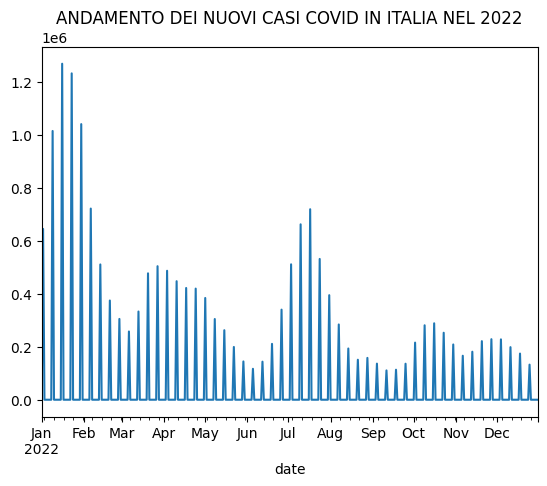

In [225]:
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 

#Realizzo il grafico che mostra l'andamento dei nuovi casi in Italia nel 2022
df_ita["new_cases"].plot(title="ANDAMENTO DEI NUOVI CASI COVID IN ITALIA NEL 2022")


Di seguito possiamo osservare le prime due date oggetto dello studio nel 2022 in Italia:
            total_cases  new_cases
date                              
2022-01-01    5622431.0        0.0
2022-01-02    6267035.0   644604.0.

I due andamenti sono praticamente identici, poichè andare ad osservare l'andamento della somma cumulativa dei nuovi casi
è equivalente ad osservare l'andamento dei casi totali. L'unica differenza è data dal valore iniziale dei casi totali nel 2022, pari a 
5622431).

Per verificare ciò, è possibile osservare il conteggio dei valori univoci riportati nella colonna calcolata
ottenuta effettuando la differenza elemento per elemento tra la colonna total_cases, contenente l'andamento dei casi
totali e la colonna new_cases_cum, contenente l'andamento della somma cumulativa dei nuovi casi: 

5622431.0    365
Name: count, dtype: int64.


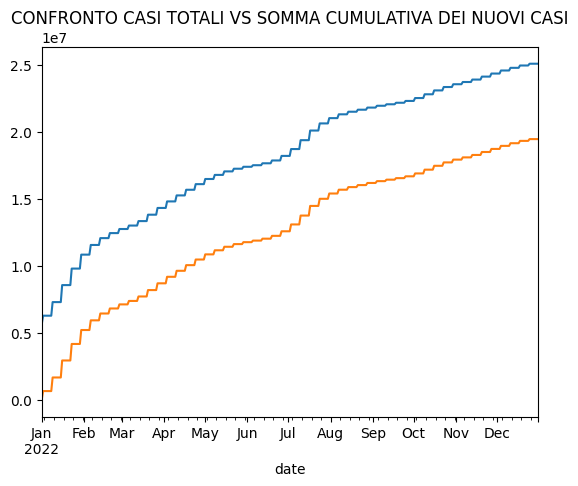

In [226]:
"""Mostrare infine un grafico che mostra l'andamento della somma cumulativa dei nuovi casi del 2022, e commentare 
se ci sono similarità con l'andamento del numero dei casi totali;"""

df_ita["new_cases_cum"]=df_ita["new_cases"].cumsum()

#Disegno all'interno dello stesso grafico l'andamento della somma cumulativa nuovi casi e l'andamento del numero dei casi totali
df_ita["total_cases"].plot(title="CONFRONTO CASI TOTALI VS SOMMA CUMULATIVA DEI NUOVI CASI")
df_ita["new_cases_cum"].plot()

#Creiamo una colonna che contiene la differenza tra l'andamento della somma cumulativa nuovi casi e l'andamento del numero dei casi totali
series_expl=df_ita["total_cases"]-df_ita["new_cases_cum"]

#Spieghiamo le similitudini tra i due andamenti
print(f"""Di seguito possiamo osservare le prime due date oggetto dello studio nel 2022 in Italia:
{df_ita[["total_cases","new_cases"]].head(2)}.

I due andamenti sono praticamente identici, poichè andare ad osservare l'andamento della somma cumulativa dei nuovi casi
è equivalente ad osservare l'andamento dei casi totali. L'unica differenza è data dal valore iniziale dei casi totali nel 2022, pari a 
{int(df_ita["total_cases"].iloc[0])}).

Per verificare ciò, è possibile osservare il conteggio dei valori univoci riportati nella colonna calcolata
ottenuta effettuando la differenza elemento per elemento tra la colonna total_cases, contenente l'andamento dei casi
totali e la colonna new_cases_cum, contenente l'andamento della somma cumulativa dei nuovi casi: 

{series_expl.value_counts()}.""")





Dai boxplot si può osservare come nell'arco temporale considerato in Italia si siano avuti numeri di ricoverati 
in terapia intensiva significativamente più bassi rispetto alla Francia ed alla Germania.


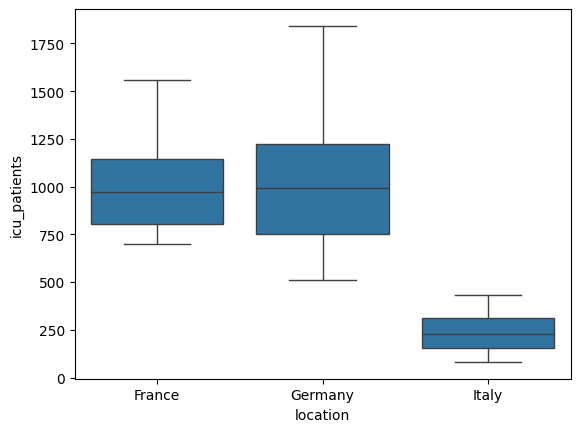

In [321]:
"""Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti
in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo"""

#Creo una maschera per il filtraggio
start_date= pd.to_datetime("2022-05-01", format="%Y-%m-%d")
end_date= pd.to_datetime("2023-04-30", format="%Y-%m-%d")
mask=((df["location"]=="Italy") | (df["location"]=="Germany") | (df["location"]=="France")) & ((df["date"]>=start_date) & (df["date"]<=end_date))

#Genero un dataframe filtrato per disegnare i boxplot
df_bp=df.loc[mask]

#Importo seaborn
import seaborn as sns

#disegno un boxplot che consente il confronto richiesto
sns.boxplot(data=df_bp,x="location",y="icu_patients")

print("""Dai boxplot si può osservare come nell'arco temporale considerato in Italia si siano avuti numeri di ricoverati 
in terapia intensiva significativamente più bassi rispetto alla Francia ed alla Germania.""")






,France,Germany,Italy,Spain
% valori nulli,75,100,0,56
totale ospedalizzazioni,1340,0,9367,2774


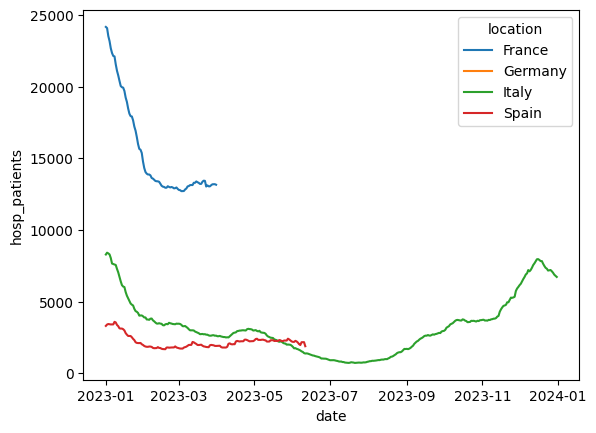

In [310]:
"""Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna
— se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno."""

#Disegno un grafico che mostra l'andamento del numero di pazienti ospedalizzati nelle nazioni considerate nel 2023
mask=((df["location"]=="Italy") | (df["location"]=="Germany") | (df["location"]=="France") | (df["location"]=="Spain")) & (df["year"]==2023)
sns.lineplot(x="date", y="hosp_patients", data=df[mask],hue="location")       


#Definisco un dizionario vuoto funzionale per il loop successivo 
d={}

#Inizio un loop per ogni nazione 
for nat in ["France","Germany","Italy","Spain"]:

    #Creo una maschera per filtrare dal dataframe di partenza df i record relativi all'anno 2023 ed alla nazione nat
    mask=(df["location"]==nat) & (df["year"]==2023)
    
    #Genero un dataframe filtrato che contiene i record di df relativi all'anno 2023 ed alla nazione nat
    df_nat=df.loc[mask]

    # Calcolo la % di valori null all'interno della colonna hosp_patients nel dataframe df_nat
    null_count=(df_nat["hosp_patients"].isna().sum()/(df_nat["hosp_patients"].isna().sum()+df_nat["hosp_patients"].notna().sum()))*100

    """Come si può osservare dall'output di tale cella,nel 2023, per quanto concerne la colonna hosp_patients, l' Italia contiene 
    tutti valori non nulli, la Germania contiene tutti valori nulli,mentre la Francia e la Spagna, da un certo punto in poi, contengono 
    tutti valori non nulli.
    Per quanto concerne la Francia e la Spagna, assumo che il dato rimanga stabile e pari all'ultimo valore disponibile, mentre per la 
    Germania non è possibile calcolare il numero di pazienti ospedalizzati, dato che per essa tutti i valori sono nulli sia nel 2023 
    che negli altri anni"""
    df_nat["hosp_patients"].ffill()
    
    
    """Calcolo il numero totale di pazienti ospedalizzati, tenendo conto che i dati necessitano di essere sistemati. Infatti, se sommassi
    direttamente i valori nella colonna hosp_count commetterei un errore, essendo ogni valore il numero di pazienti ospedalizzati in un dato
    giorno e non il numero di nuovi pazienti ospedalizzati in quel giorno."""
    hosp_count=df_nat["hosp_patients"].diff().clip(lower=0).sum()

    """Aggiungo ad un dizionario d una coppia chiave-valore, in cui la chiave è data dalla nazione nat ed il valore è una lista
    contenente sia la % dei nulli che il conteggio dei pazienti ospedalizzati"""
    d[nat]=[round(null_count),round(hosp_count)]
    
#Creo un dataframe che mi consente di visualizzare per ogni nazione nel 2023, la % di valori nulli ed il totale delle ospedalizzazioni
df_counts=pd.DataFrame(d,index=["% valori nulli","totale ospedalizzazioni"])

df_counts


In [320]:
#Verifico che nella colonna hosp_patients per la Germania ho sempre valori nulli
df_ger=df[df["location"]=="Germany"]
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 130278 to 131867
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1590 non-null   object        
 1   continent                                   1590 non-null   object        
 2   location                                    1590 non-null   object        
 3   date                                        1590 non-null   datetime64[ns]
 4   total_cases                                 1590 non-null   float64       
 5   new_cases                                   1282 non-null   float64       
 6   new_cases_smoothed                          1277 non-null   float64       
 7   total_deaths                                1590 non-null   float64       
 8   new_deaths                                  1282 non-null   float64       
 9   new_de